In [311]:
import pandas as pd
from google.colab import files
import io
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as PImage
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

In [312]:

#Se carga el dataset desde un repositorio en github
ds = pd.read_csv('https://raw.githubusercontent.com/lsrinconc/tg-desercion/main/dataset_estudiantes.csv', sep=';')


**Configuración**

In [313]:
#Formateo de columnas
#Formateo Edad_rango
ds['Edad_rango'] = ds['edad_rango'].map( {'0 a 20': 16, 
                                        '21 a 25': 21,
                                        '26 a 30': 26, 
                                        '31 a 40': 31,
                                        'Mayor a 40': 40}).astype(int)
# Formateo Genero 
ds['Genero'] = ds['genero'].map( {'F': 0, 'M': 1}).astype(int)

#Formateo Jornada
ds['Jornada'] = ds['jornada'].map( {'DIURNA': 0, 'NOCTURNA': 1}).astype(int)

#Formateo Estado civil
ds['Estado_civil'] = ds['estado_civil'].map( {'CASADO': 0, 
                                              'DIVORCIADO': 1, 
                                              'SEPARADO': 2, 
                                              'SOLTERO': 3, 
                                              'UNION LIBRE': 4, 
                                              'OTRO':5}).astype(int)

#Formateo ingresos familiares
ds['Ingresos_familiares'] = ds['ingresos_familiares'].map( {'ENTRE 0-1 SALARIOS MINIMOS': 0, 
                                                            'ENTRE 1-2 SALARIOS MINIMOS': 1, 
                                                            'ENTRE 2-5 SALARIOS MINIMOS': 2, 
                                                            'MAYOR 5 SALARIOS  MINIMOS': 3}).astype(int)

#Formateo calificaciones
ds['C1_rango'] = ds['c1_rango'].map( {'ENTRE 0 Y 2.9': 0, 'ENTRE 3 Y 3.9': 3, 'ENTRE 4 Y 5': 5}).astype(int)
ds['C2_rango'] = ds['c2_rango'].map( {'ENTRE 0 Y 2.9': 0, 'ENTRE 3 Y 3.9': 3, 'ENTRE 4 Y 5': 5}).astype(int)
ds['P1_rango'] = ds['p1_rango'].map( {'ENTRE 0 Y 2.9': 0, 'ENTRE 3 Y 3.9': 3, 'ENTRE 4 Y 5': 5}).astype(int)
ds['P2_rango'] = ds['p2_rango'].map( {'ENTRE 0 Y 2.9': 0, 'ENTRE 3 Y 3.9': 3, 'ENTRE 4 Y 5': 5}).astype(int)
ds['Promedio_acumulado_rango'] = ds['promedio_acumulado_rango'].map( {'ENTRE 0 Y 2.9': 0, 'ENTRE 3 Y 3.9': 3, 'ENTRE 4 Y 5': 5}).astype(int)

#Formateo promedio_asignaturas_sem_rango
#Los valores correspondientes a MAS DE 8, se reemplazan por 1, con el fin de reemplazar esos valores atípicos con la moda
ds['Cantidad_asignaturas_sem_rango'] = ds['cantidad_asignaturas_sem_rango'].map( {'ENTRE 1 Y 4': 0, 'ENTRE 5 Y 8': 1, 'MAS DE 8': 1}).astype(int)


# Array con los nombres de las columnas a eliminar
columnas_eliminar = ['documento','edad','edad_rango','genero','jornada',
                 'estado_civil','ingresos_familiares',
                 'c1_rango','c2_rango','p1_rango','p2_rango','c1','c2','p1','p2',
                 'cantidad_asignaturas_sem','cantidad_asignaturas_sem_rango','promedio_acumulado','promedio_acumulado_rango']
# Se eliminan las columnas que sin formatear y las columnas que no son necesarias para el analisis y se guardan en una nueva variable
ds_formateado = ds.drop(columnas_eliminar, axis = 1)


# Se separan los atributos (X) y  clase (y)
X = ds_formateado.drop('desertor', axis=1)
y = ds_formateado['desertor']



# Se dividen los datos en dos grupos. Datos de entrenamiento(65%) y prueba(35%) 
X_entr, X_prueba, y_entr, y_prueba = train_test_split(X, y, test_size=0.35)


In [316]:
# Funcion para dibujar matriz de confusion
LABELS = ["NO Desertor","Desertor"]
def mostrar_matriz_conf(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.show()


# Nombres de las columnas
columns=list(X.columns.values)

Arboles de decisión

In [326]:
# parametrizacion 

std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                          ('pca', pca),
                          ('dec_tree', dec_tree)])

criterion = ['gini', 'entropy']
min_samples_split = [4,8,12,16,20,24,28,32,36,40]
min_samples_leaf = [2,4,6,8,10,12,14,16,18,20]

parametros = dict(
                  dec_tree__criterion=criterion,
                  dec_tree__min_samples_split=min_samples_split,
                  dec_tree__min_samples_leaf=min_samples_leaf
                  )

clf_GS = GridSearchCV(pipe, parametros)
clf_GS.fit(X, y)

print('Mejor Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Mejor min_samples_split:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split'])
print('Mejor min_samples_leaf:', clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf'])


Mejor Criterion: entropy
Mejor min_samples_split: 20
Mejor min_samples_leaf: 18


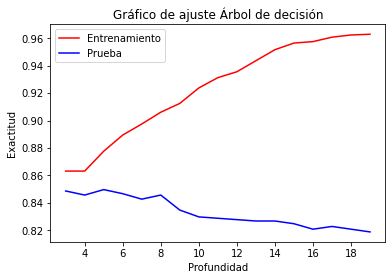

In [318]:
# Grafico de ajuste del árbol de decisión
train_score =  []
test_score = []
max_deep_list = list(range(3, 20))


for deep in max_deep_list:
    arbol = DecisionTreeClassifier(criterion='entropy', max_depth=deep)
    arbol.fit(X_entr, y_entr)
    train_score.append(arbol.score(X_entr, y_entr))
    test_score.append(arbol.score(X_prueba, y_prueba))

# graficar los resultados.
plt.plot(max_deep_list, train_score, color='r', label='Entrenamiento')
plt.plot(max_deep_list, test_score, color='b', label='Prueba')
plt.title('Gráfico de ajuste Árbol de decisión')
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

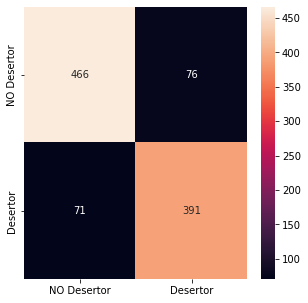

Accuracy Score: 0.8536
Recall Score: 0.8463
Specificity Score: 0.8598


In [327]:
# Creación modelo
classifier = DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=18,
                                            max_depth = 5)

classifier.fit(X_entr, y_entr)
y_pred = classifier.predict(X_prueba)
mostrar_matriz_conf(y_prueba,y_pred)
print("Accuracy Score: {:.4f}".format(accuracy_score(y_prueba,y_pred)))
print("Recall Score: {:.4f}".format(recall_score(y_prueba,y_pred)))
print("Specificity Score: {:.4f}".format(recall_score(y_prueba,y_pred, pos_label=0)))

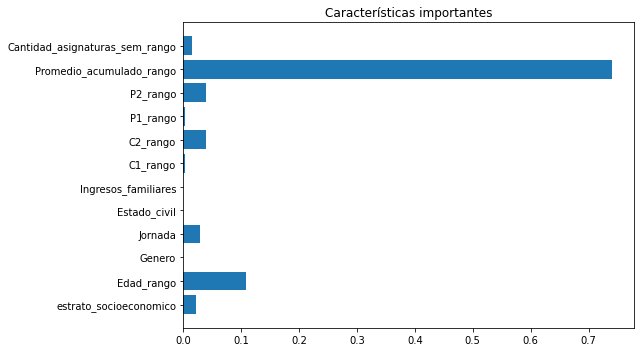

In [320]:
# Imprimir caracterisitcas importantes
importance = classifier.feature_importances_

plt.figure(figsize=(9, 5))
plt.title('Características importantes')
plt.barh(range(X_entr.shape[1]), importance, align='center')
plt.yticks(range(X_entr.shape[1]), columns)
plt.tight_layout()
plt.show()




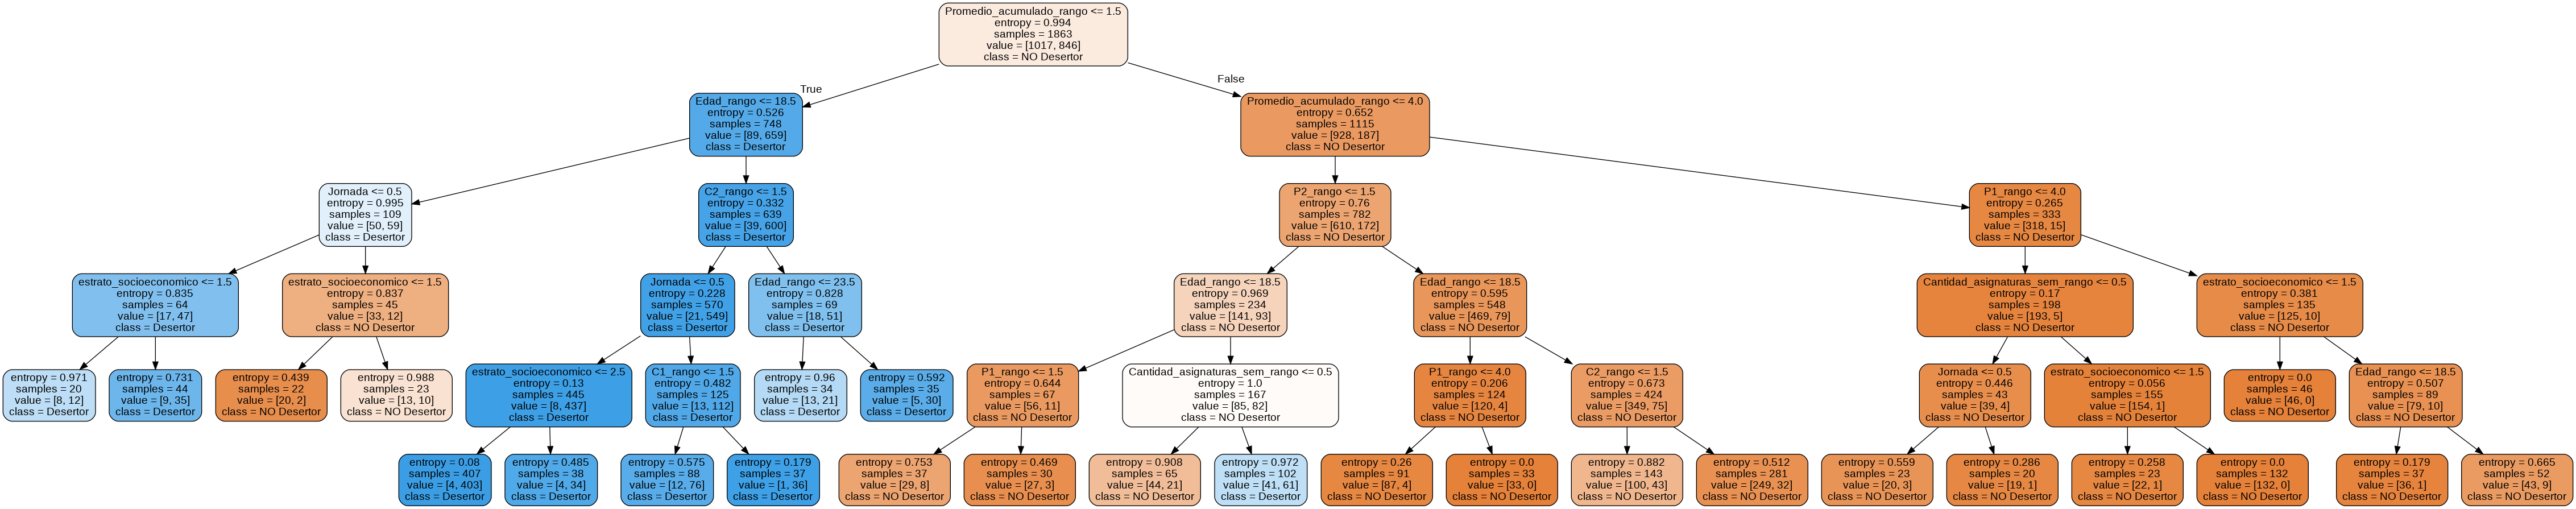

In [328]:
# Generar grafico del arbol 
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(classifier,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(ds_formateado.drop(['desertor'], axis=1)),
                              class_names = ['NO Desertor', 'Desertor'],
                              rounded = True,
                              filled= True )

        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

K Vecinos más cercanos

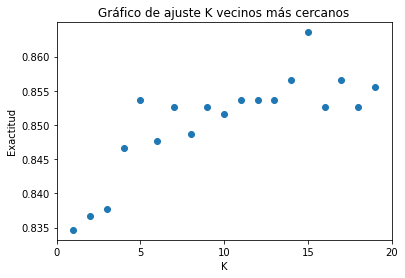

In [329]:
#Parametrización
# Se normalizan los atributos (X) de entrenamiento y prueba
scaler = MinMaxScaler()
X_entr_knn = scaler.fit_transform(X_entr)
X_prueba_knn = scaler.transform(X_prueba)


k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entr_knn, y_entr)
    scores.append(knn.score(X_prueba_knn, y_prueba))
plt.figure()
plt.title('Gráfico de ajuste K vecinos más cercanos')
plt.ylabel('Exactitud')
plt.xlabel('K')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()


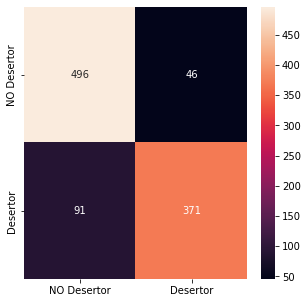

Accuracy Score: 0.8635
Recall Score: 0.8030
Specificity Score: 0.9151


In [331]:
#Modelo
k = 15
knn = KNeighborsClassifier(k)
knn.fit(X_entr_knn, y_entr)
y_pred = knn.predict(X_prueba_knn)

mostrar_matriz_conf(y_prueba,y_pred)
print("Accuracy Score: {:.4f}".format(accuracy_score(y_prueba,y_pred)))
print("Recall Score: {:.4f}".format(recall_score(y_prueba,y_pred)))
print("Specificity Score: {:.4f}".format(recall_score(y_prueba,y_pred, pos_label=0)))

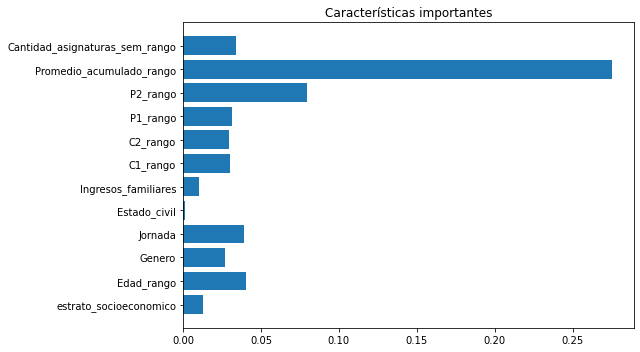

In [332]:
# Imprimir caracterisitcas importantes
results = permutation_importance(knn, X_prueba_knn, y_pred, scoring='accuracy')
K_importance = results.importances_mean


plt.figure(figsize=(9, 5))
plt.title('Características importantes')
plt.barh(range(X_entr_knn.shape[1]), K_importance, align='center')
plt.yticks(range(X_prueba_knn.shape[1]), columns)
plt.tight_layout()
plt.show()




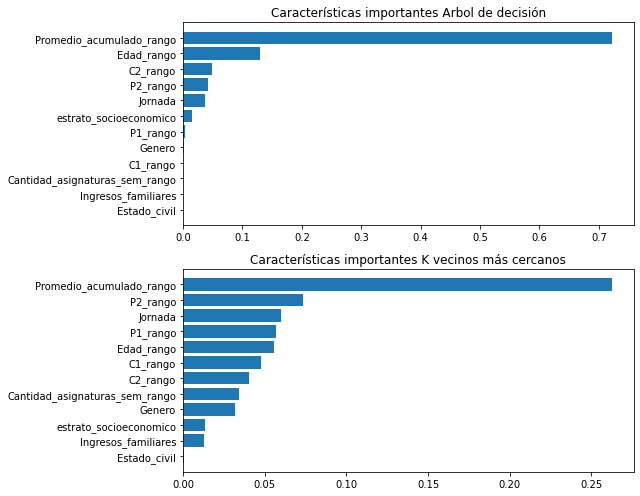

In [309]:

#Se ordenan las importancias
sorted_indices = np.argsort(importance)
sorted_indices_knn = np.argsort(K_importance)

#se grafican las características de ambos modelos
fig, (ax1, ax2)  = plt.subplots(2,1,figsize=(9,7))

ax1.set_title("Características importantes Arbol de decisión")
ax1.barh(range(12), importance[sorted_indices], align='center')
ax1.set_yticks(   (range(12) ) )
ax1.set_yticklabels(   (  X.columns[sorted_indices.astype(int)]) )

ax2.set_title("Características importantes K vecinos más cercanos")
ax2.barh(range(12), K_importance[sorted_indices_knn], align='center')
ax2.set_yticks((range(12)))
ax2.set_yticklabels(X.columns[sorted_indices_knn.astype(int)])
fig.tight_layout()

plt.show()

In [333]:
#exportacion del modelo
joblib.dump(knn, 'modelo_knn.pkl')
files.download('modelo_knn.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>